# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [151]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [152]:
# loading the data:
data= pd.read_csv("/Users/annavilardell/Desktop/BootcampData/44-lab-unsupervised-learning/data/Wholesale customers data.csv")

In [153]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [154]:
# Your code here:

In [155]:
# types of each column 
data.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [156]:
"""
All int so no need to convert any categorical data (non existing)
"""

'\nAll int so no need to convert any categorical data (non existing)\n'

In [157]:
# NANs
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [158]:
"""
No missing data
"""

'\nNo missing data\n'

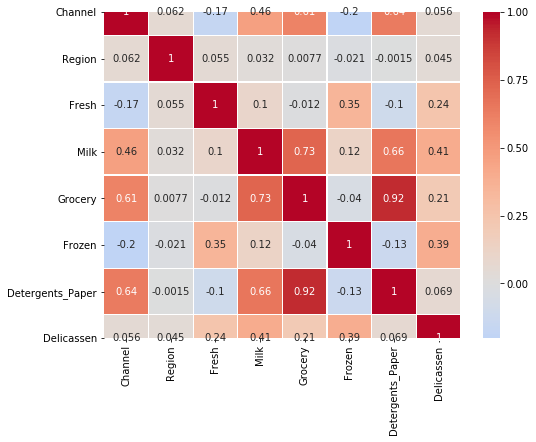

In [159]:
# Check Collinearity

# Check correlation between variables with heatmap
plt.figure(figsize = (8,6))
sns.heatmap(data.corr(), linewidths =0.2 ,cmap = 'coolwarm',center = 0,annot = True)
plt.yticks(rotation = 0);

In [160]:
"""
We seem to have collinearity as Detergents_Paper & Grocery are highly correlated. We could take it out.
"""

'\nWe seem to have collinearity as Detergents_Paper & Grocery are highly correlated. We could take it out.\n'

In [161]:
# Descriptive statistics to see if there is any outliers to remove
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


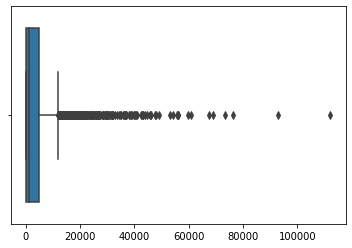

In [162]:
# we use boxplot to check outliers of all columns
sns.boxplot(data);

In [163]:
[col for col in data.columns]

['Channel',
 'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicassen']

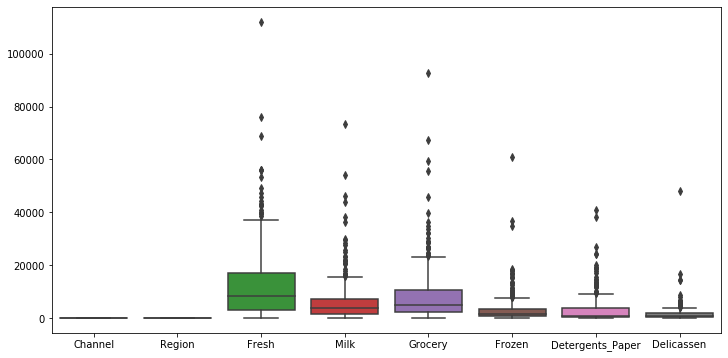

In [164]:
# vemos col por col los outliers

items= [col for col in data.columns ]
plt.figure(figsize=(12,6))
sns.boxplot(data=data[items]);


In [165]:
"""
We see that we have outliers (in all columns/items except for Channel & Region)
"""

'\nWe see that we have outliers (in all columns/items except for Channel & Region)\n'

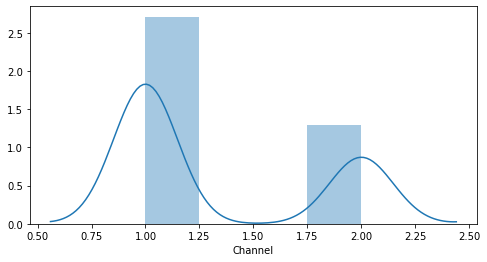

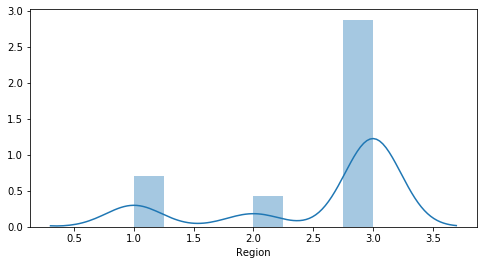

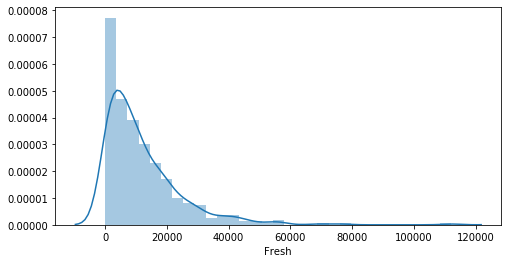

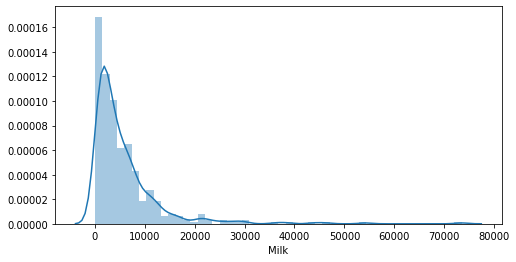

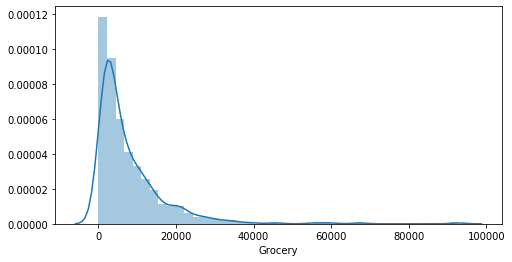

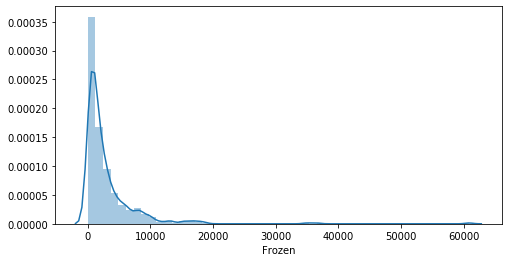

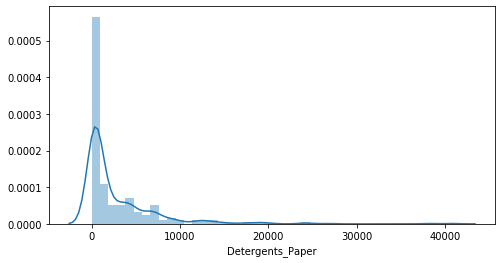

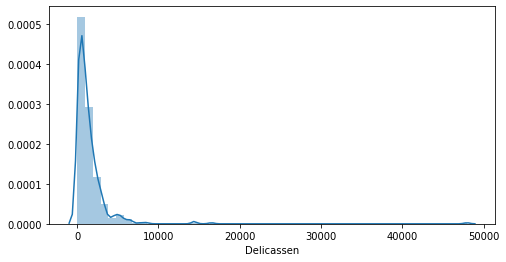

In [166]:
# Column-wise data distribution - is the distribution skewed?

for i in items:
    plt.figure(figsize=(8,4))
    sns.distplot(data[i])


In [167]:
"""
We see that we have a distribution skewed in all columns/items except for Channel & Region that seems to be categorical v.
"""

'\nWe see that we have a distribution skewed in all columns/items except for Channel & Region that seems to be categorical v.\n'

In [168]:
# Your observations here
"""
written above after every observation
"""

'\nwritten above after every observation\n'

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [169]:
# Your code here

# Removing column Detergents_Paper to avoid collinearity
data_clean=data.drop(columns="Detergents_Paper")

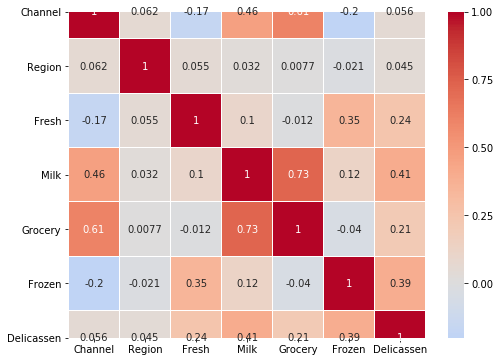

In [170]:
# Check correlation to see also if any collinearity with heatmap
plt.figure(figsize = (8,6))
sns.heatmap(data_clean.corr(), linewidths =0.2 ,cmap = 'coolwarm',center = 0,annot = True)
plt.yticks(rotation = 0);

In [ ]:
# Your comment here
"""
As commented above, out of all cleaning we could do, we could just take out the collinearity 
by removing column Detergents_Paper
"""

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [ ]:
"""
StandardScaler -> Standardize features by removing the mean and scaling to unit variance
"""

In [177]:
# Your import here:
from sklearn.preprocessing import StandardScaler

# Your code here:
scaler = StandardScaler()
print("Fit \n", scaler.fit(data), "\n")
print("Mean \n", scaler.mean_, "\n")
print("Transform \n", scaler.transform(data), "\n")

Fit 
 StandardScaler() 

Mean 
 [1.32272727e+00 2.54318182e+00 1.20002977e+04 5.79626591e+03
 7.95127727e+03 3.07193182e+03 2.88149318e+03 1.52487045e+03] 

Transform 
 [[ 1.44865163  0.59066829  0.05293319 ... -0.58936716 -0.04356873
  -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197 ... -0.27013618  0.08640684
   0.08915105]
 [ 1.44865163  0.59066829 -0.44702926 ... -0.13753572  0.13323164
   2.24329255]
 ...
 [ 1.44865163  0.59066829  0.20032554 ... -0.54337975  2.51121768
   0.12145607]
 [-0.69029709  0.59066829 -0.13538389 ... -0.41944059 -0.56977032
   0.21304614]
 [-0.69029709  0.59066829 -0.72930698 ... -0.62009417 -0.50488752
  -0.52286938]] 



In [178]:
# Assign the transformed data to a new variable customers_scale
customers_scale= scaler.transform(data)

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [179]:
# Your code here:

# imports
from sklearn.cluster import KMeans
from sklearn import cluster, datasets, mixture

# KMeans
kmeans= KMeans()

# fit
clusters= kmeans.fit(customers_scale)

# labels
data['labels']= clusters.labels_

In [180]:
# check
data['labels']

0      5
1      5
2      5
3      0
4      5
      ..
435    3
436    3
437    1
438    0
439    0
Name: labels, Length: 440, dtype: int32

Count the values in `labels`.

In [181]:
# Your code here:
data['labels'].value_counts()

0    175
5     94
2     85
3     41
1     36
4      6
7      2
6      1
Name: labels, dtype: int64

In [ ]:
"""
help from https://realpython.com/k-means-clustering-python/
"""

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [182]:
# Your code here

# imports
from sklearn.cluster import DBSCAN

# DBSCAN
dbscan= DBSCAN(eps=0.5).fit(customers_scale)
data["labels_DBSCAN"]= dbscan.labels_

In [183]:
# check
data["labels_DBSCAN"] 

0     -1
1     -1
2     -1
3      1
4     -1
      ..
435   -1
436   -1
437   -1
438    1
439    1
Name: labels_DBSCAN, Length: 440, dtype: int64

Count the values in `labels_DBSCAN`.

In [184]:
# Your code here
data["labels_DBSCAN"].value_counts()

-1    255
 1    130
 5     22
 4      7
 6      6
 2      5
 7      5
 3      5
 0      5
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

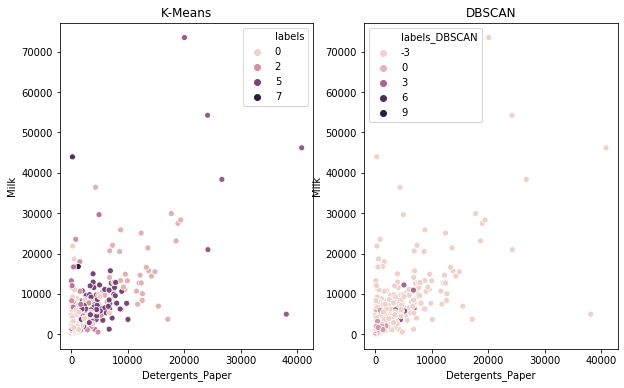

In [195]:
# Your code here:

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
plt.sca(ax1)

ax1 = sns.scatterplot(x=data.Detergents_Paper, y=data.Milk, hue=data.labels)
ax1.set_title('K-Means')
ax1.legend()

plt.sca(ax2)
ax2 = sns.scatterplot(x=data.Detergents_Paper, y=data.Milk, hue=data.labels_DBSCAN)
ax2.set_title('DBSCAN')
ax2.legend();

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

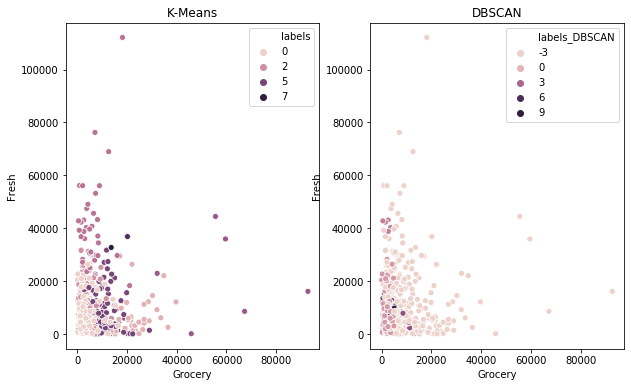

In [197]:
# Your code here:

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
plt.sca(ax1)

ax1 = sns.scatterplot(x=data.Grocery, y=data.Fresh, hue=data.labels)
ax1.set_title('K-Means')
ax1.legend()

plt.sca(ax2)
ax2 = sns.scatterplot(x=data.Grocery, y=data.Fresh, hue=data.labels_DBSCAN)
ax2.set_title('DBSCAN')
ax2.legend();

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

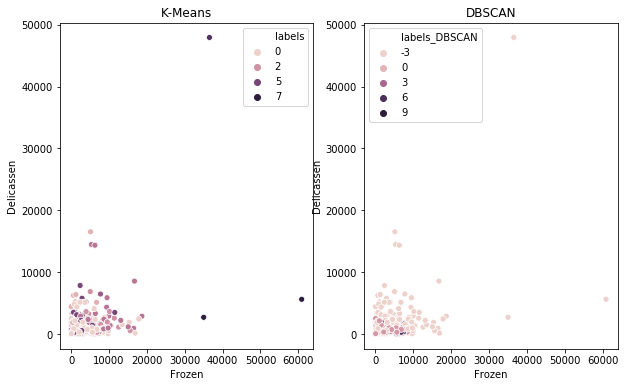

In [198]:
# Your code here:

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
plt.sca(ax1)

ax1 = sns.scatterplot(x=data.Frozen, y=data.Delicassen, hue=data.labels)
ax1.set_title('K-Means')
ax1.legend()

plt.sca(ax2)
ax2 = sns.scatterplot(x=data.Frozen, y=data.Delicassen, hue=data.labels_DBSCAN)
ax2.set_title('DBSCAN')
ax2.legend();

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [201]:
# Your code here:

data.groupby(["labels"]).mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN
labels,,,,,,,,,
0,1.000000,3.000000,8816.377143,2952.085714,3427.154286,2680.851429,774.268571,1006.748571,0.462857
1,2.000000,2.138889,5850.361111,15629.555556,23907.138889,1754.361111,11192.805556,2491.972222,-1.000000
2,1.047059,1.305882,10292.658824,3219.035294,4079.470588,3137.741176,874.035294,1079.682353,1.517647
3,1.048780,2.780488,39870.292683,4916.853659,5740.585366,6566.926829,901.268293,2595.951220,-0.536585
4,2.000000,2.833333,21350.000000,39710.333333,58864.833333,2202.666667,29017.000000,2494.500000,-1.000000
5,2.000000,2.840426,8596.978723,7380.670213,11350.925532,1465.574468,4707.340426,1442.840426,-0.361702
6,1.000000,3.000000,36847.000000,43950.000000,20170.000000,36534.000000,239.000000,47943.000000,-1.000000
7,1.000000,2.500000,22015.500000,9937.000000,7844.000000,47939.000000,671.500000,4153.500000,-1.000000


In [202]:
data.groupby(["labels_DBSCAN"]).mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
labels_DBSCAN,,,,,,,,,
-1,1.490196,2.45098,13729.564706,8359.886275,11484.364706,3795.003922,4356.800000,2080.470588,2.631373
0,2.000000,3.00000,11401.000000,3536.200000,6729.000000,720.200000,3561.000000,258.200000,5.000000
1,1.000000,3.00000,9128.823077,1862.438462,2423.530769,2131.430769,496.576923,741.946154,0.046154
2,1.000000,3.00000,41446.600000,1421.200000,2167.600000,1276.400000,416.200000,784.800000,3.000000
3,2.000000,3.00000,2357.200000,10224.800000,11862.800000,609.600000,5780.000000,572.800000,5.000000
4,2.000000,3.00000,3068.142857,6095.857143,10355.000000,994.000000,4675.571429,1826.428571,5.000000
5,1.000000,1.00000,9837.863636,1751.863636,2161.681818,1513.181818,333.954545,669.045455,2.000000
6,1.000000,1.00000,6823.000000,1943.000000,2372.666667,6780.333333,386.500000,613.666667,2.000000
7,1.000000,2.00000,7494.600000,1537.600000,3383.000000,2575.400000,227.400000,941.000000,2.000000


Which algorithm appears to perform better?

In [ ]:
# Your observations here
"""
K-Means cluster is one of the most commonly used unsupervised machine learning clustering techniques. 
It is a centroid based clustering technique that needs you decide the number of clusters (centroids) and 
randomly places the cluster centroids to begin the clustering process. 
The goal is to divide N observations into K clusters repeatedly until no more groups can be formed.

DBSCAN is a density-based clustering algorithm that forms clusters of dense regions of data points 
ignoring the low-density areas (considering them as noise).
DBScan doesn’t work well over clusters with different densities



In this case I'd doubt about DBSCAN as we have lots of outliers (=noise). But not sure*
"""

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [209]:
# Your code here

# KMeans
kmeans= KMeans()

# fit
clusters= kmeans.fit(customers_scale)


In [ ]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here